In [1]:
HTML("""
<iframe src='https://asaragga.github.io/GRF.jl/' width=1000 height=275></iframe>
    """)

HTML{String}("<iframe src='https://asaragga.github.io/GRF.jl/' width=1000 height=275></iframe>\n    ")

Trabalho realizado por:
Cátia Prates 20161046
Patrícia Mateus 20161020
TFN61

## 1. Instalar e Disponibilizar Aplicações Essenciais

(Carregar em >|Run para, sucessivamente, ir executando as células do notebook)

### 1.1 Instalar Aplicações Essenciais

Utilização remota, e.g. Binder: 

  * Mantêr todos os # 

Se fôr a primeira utilização local deste notebook :
  * Caso Julia Pro tenha sido instalada, apenas retirar os # na primeira e na segunda linha
  * Caso contrário, retirar # em todas as linhas (ou apenas naquelas relativas a aplicações ainda não instaladas)

In [3]:
import Pkg 
Pkg.add("TimeSeries")
Pkg.add("Distributions")      
Pkg.add("StatsBase")          
Pkg.add("HypothesisTests")    
Pkg.add("StatsPlots")         
Pkg.add("Interact")           

  Updating registry at `/srv/julia/pkg/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
Fetching: [========================================>]  100.0 %.0 %12.4 %                         ]  36.8 % [====================>                    ]  49.1 %Fetching: [=========================>               ]  60.0 %           ]  72.3 % [==================================>      ]  84.7 % ]  96.9 % Resolving package versions...
 Installed OffsetArrays ──────────────── v0.11.0
 Installed QuadGK ────────────────────── v2.0.4
 Installed Plots ─────────────────────── v0.25.1
 Installed TableTraits ───────────────── v1.0.0
 Installed Arpack ────────────────────── v0.3.1
 Installed GeometryTypes ─────────────── v0.7.3
 Installed BinaryProvider ────────────── v0.5.4
 Installed Interpolations ────────────── v0.12.0
 Installed PDMats ────────────────────── v0.9.7
 Installed PositiveFactorizations ────── v0.2.2
 Installed AbstractFFTs ──────────────── v0.4.1
 Installe

### 1.2 Disponibilizar Aplicações

In [6]:
using LinearAlgebra, Distributions, StatsBase, HypothesisTests, StatsPlots, Interact, TimeSeries

## 2. Obter Dados

In [7]:
VPortfolio = 74.6                                               
cambio = 0.884680                                               # Câmbio USD/EUR no final do dia 2019-04-15
dados = readtimearray("Dow-Jones.csv")                          # Tabela com retornos diários

1567×33 TimeArray{Float64,2,Date,Array{Float64,2}} 2013-01-02 to 2019-04-15
│            │ BT3m   │ SP500   │ MMM     │ AXP     │ AAPL    │ BA      │
├────────────┼────────┼─────────┼─────────┼─────────┼─────────┼─────────┤
│ 2013-01-02 │ 0.0    │ 0.0254  │ 0.0208  │ 0.0257  │ 0.0317  │ 0.0227  │
│ 2013-01-03 │ 0.0    │ -0.0021 │ -0.0012 │ 0.0043  │ -0.0126 │ 0.0052  │
│ 2013-01-04 │ 0.0    │ 0.0049  │ 0.0074  │ 0.0103  │ -0.0279 │ 0.0028  │
│ 2013-01-07 │ 0.0    │ -0.0031 │ 0.0013  │ 0.0042  │ -0.0059 │ -0.0201 │
│ 2013-01-08 │ 0.0    │ -0.0032 │ 0.0001  │ 0.0057  │ 0.0027  │ -0.0263 │
│ 2013-01-09 │ 0.0    │ 0.0027  │ 0.0095  │ 0.001   │ -0.0156 │ 0.0355  │
│ 2013-01-10 │ 0.0    │ 0.0076  │ 0.005   │ 0.0088  │ 0.0124  │ 0.0043  │
│ 2013-01-11 │ 0.0    │ -0.0    │ -0.0063 │ 0.0074  │ -0.0061 │ -0.025  │
│ 2013-01-14 │ 0.0    │ -0.0009 │ 0.0083  │ -0.0005 │ -0.0357 │ 0.0185  │
│ 2013-01-15 │ 0.0    │ 0.0011  │ 0.0022  │ -0.0074 │ -0.0315 │ 0.0051  │
│ 2013-01-16 │ 0.0    │ 0.0002  │ 0.

Temos 33 colunas = ```:BT3m, :SP500, :MMM, :AXP, :AAPL, :BA, :CAT, :CVX, :CSCO, :KO, :DWDP, :XOM, :GS, :IBM, :INTC, :JNJ, :JPM,:MCD, :MRK, :MSFT, :NKE, :PFE, :PG, :HD, :TRV, :UTX, :UNH, :VZ, :V, :WBA, :WMT, :DIS, :USDEUR```

Por conveniência, iremos guardar os nomes das colunas no vetor ```simbolos(33x1)``` 

In [8]:
simbolos = colnames(dados);   

Igualmente, iremos guardar as datas das observações no vetor imaginativamente chamado ```datas(1567x1)``` 

In [9]:
datas = timestamp(dados);

## 3. Visualizar Dados

### 3.1 Séries Temporais de Retornos

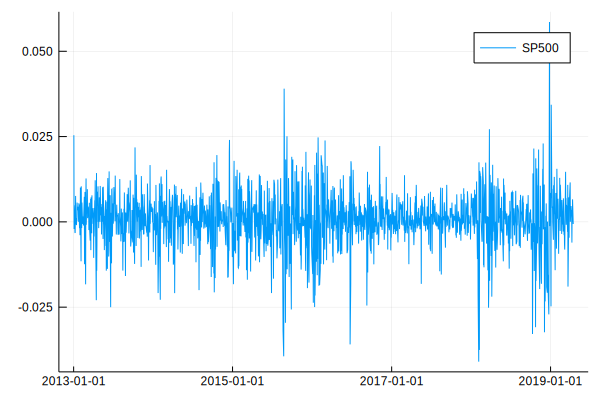

In [10]:
plot(dados[:SP500])         

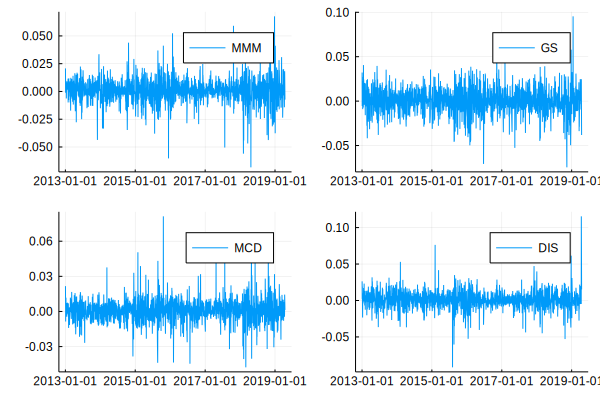

In [11]:
plot(plot(dados[:MMM]),plot(dados[:GS]),plot(dados[:MCD]),plot(dados[:DIS]))

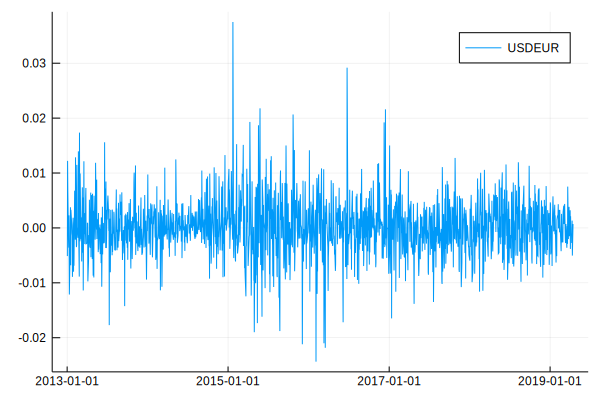

In [12]:
plot(dados[:USDEUR])        # Variação percentual diária da taxa de câmbio USD/EUR 

### 3.2 Histogramas

In [13]:
R = values(dados)           # Transforma a Tabela dados(1567x33) na Matriz R(1567x33) equivalente 

1567×33 Array{Float64,2}:
 3.06849e-6   0.0254034     0.0207862    …   0.0263104    -0.00512743 
 3.06849e-6  -0.00208562   -0.00116051       0.00215283    0.0122119  
 2.68493e-6   0.0048651     0.00739409       0.0191368     0.00691669 
 2.68493e-6  -0.00312312    0.00125833      -0.0233759    -0.00207071 
 2.68493e-6  -0.00324237    0.000104567     -0.00412029   -0.00359162 
 2.30137e-6   0.00265587    0.00952883   …   0.000394138   0.00229779 
 2.30137e-6   0.00759741    0.00497865       0.000196991  -0.00434683 
 2.68493e-6  -4.75138e-5   -0.00629592      -0.00413481   -0.012129   
 3.06849e-6  -0.000930671   0.00830927       0.00019777   -0.00502211 
 3.45205e-6   0.00112867    0.0021631        0.0098833     0.0010505  
 3.06849e-6   0.000196992   0.00318639   …   0.00861214    0.00376591 
 2.68493e-6   0.00564292    0.00491795       0.0170776    -0.0068073  
 3.06849e-6   0.00340327    0.00672932      -0.00133564    0.00330231 
 ⋮                                       ⋱         

  * ```R[:,j]``` seleciona todos os elementos da coluna ```j``` da matriz ```R```
  * ```R[i,:]``` seleciona todos os elementos da linha ```i``` da matriz ```R```

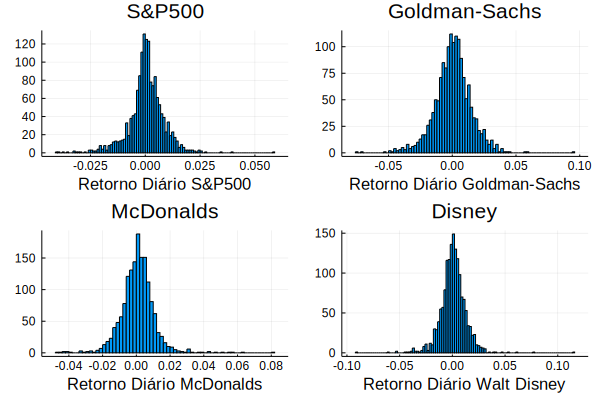

In [14]:
plot(
histogram(R[:, 2], nbins=100, title = "S&P500", xlabel = "Retorno Diário S&P500", legend = false),
histogram(R[:,13], nbins=100, title = "Goldman-Sachs", xlabel = "Retorno Diário Goldman-Sachs", legend = false),
histogram(R[:,18], nbins=100, title = "McDonalds", xlabel = "Retorno Diário McDonalds", legend = false),
histogram(R[:,32], nbins=100, title = "Disney", xlabel = "Retorno Diário Walt Disney", legend = false))

### 3.3 Dependência Linear: Correlações

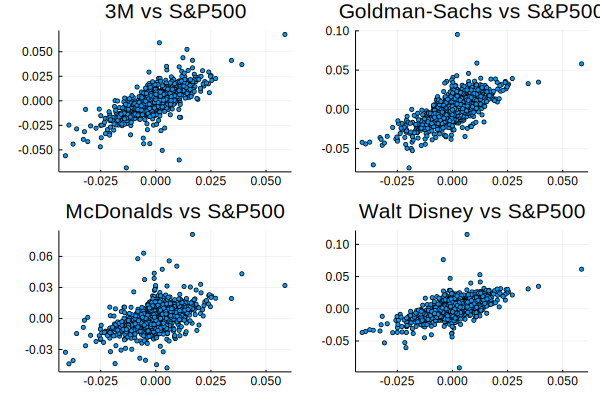

In [15]:
plot(scatter(R[:,2],R[:, 3], title = "3M vs S&P500"          , markersize = 2, legend = false),
     scatter(R[:,2],R[:,13], title = "Goldman-Sachs vs S&P500", markersize = 2, legend = false),
     scatter(R[:,2],R[:,18], title = "McDonalds vs S&P500"    , markersize = 2, legend = false),
     scatter(R[:,2],R[:,32], title = "Walt Disney vs S&P500"  , markersize = 2, legend = false))

In [16]:
println("correlação(3M,S&P500) = "           , cor(R[:, 3],R[:,2]))  
println("correlação(Goldman-Sachs,S&P500) = ", cor(R[:,13],R[:,2]))  
println("correlação(McDonalds,S&P500) = "    , cor(R[:,18],R[:,2]))  
println("correlação(Disney, S&P500) = "      , cor(R[:,32],R[:,2]))  

correlação(3M,S&P500) = 0.7348724973545354
correlação(Goldman-Sachs,S&P500) = 0.7265812699865706
correlação(McDonalds,S&P500) = 0.492349110739183
correlação(Disney, S&P500) = 0.6233612546617514


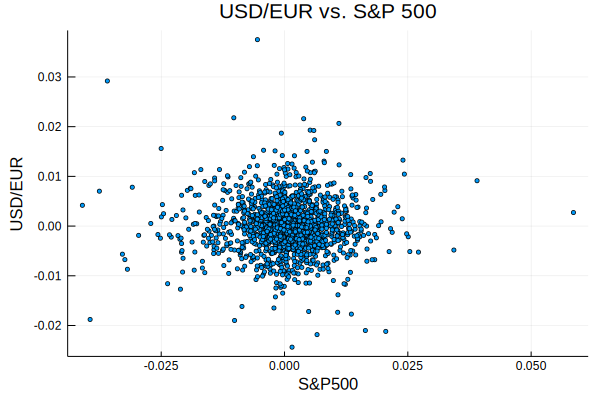

In [17]:
scatter(R[:,2],R[:,33], legend=false, markersize=2, title="USD/EUR vs. S&P 500",xlabel="S&P500",ylabel="USD/EUR") 

In [18]:
println("correlação(USD/EUR,S&P500)) = ", cor(R[:,33],R[:,2]))   

correlação(USD/EUR,S&P500)) = -0.014501938973812514


## 4. Composição do Portfólio

Definir matriz ```W(33x1)``` com os pesos no portfólio, sujeita às seguintes restrições:
  * ```0 <= w_i <= 1```      ausência de short-selling e financiamento do portfólio por empréstimos 
  * ```0 <= w_BT3m  <= 0.05```    peso máximo aplicado em BTs = 5%
  * ```0 <= w_SP500 <= 0.25```    peso máximo aplicado em instrumento replicador do S&P500 = 25%
  * Nº de açôes > 10, sendo o peso mínimo investido em cada >= 2.5%
  * ```sum(w_i) = 1```       todo o portfólio terá de ser aplicada em USD

In [19]:
W = zeros(33)   # Preencher W com zeros inicialmente (32 oportunidades de investimento + câmbio USD/EUR)
W[1] = 0.0      #  0.0% investido em BTs (indice 1 de W)
W[2] = 0.1      # 10.0% num investimento replicando S&P500 (indice 2 de W)

for i = 3:32    # 90.0% remanescentes investidos em partes iguais pelas 30 ações do Down-Jones (indices 3-32 de W)
    W[i] = 0.03
end             # Notemos que W[33] = 0 

In [20]:
sum(W)          # A soma dos pesos w_i deverá ser um valor muito próximo ou igual a 1

1.0000000000000002

## 5. Simulação Histórica

### 5.1 Simular Historicamente os Retornos do Portfolio Atual

Simulação histórica dos retornos diários do portfolio: ```RP(1567x1) = R(1567x33) * W(33x1)```

In [21]:
RP = R * W      

1567-element Array{Float64,1}:
  0.024306386696631876  
 -0.0015659031829534105 
  0.003046473364539299  
 -0.002342622827565237  
 -0.003606195907265572  
  0.005393660285075843  
  0.0066026247170925464 
  0.001509414545900396  
  0.0005585803891216904 
  0.0009177782288843624 
  0.0012652488179929985 
  0.0055050837318825555 
  0.0007451929917384106 
  ⋮                     
  0.007177389575613197  
  0.01176294628963202   
 -0.005659342664484196  
  0.0022622283141579113 
  0.0038113631336825038 
  0.0029365867398978094 
  0.00029584832790208193
 -0.005872601243764677  
  0.0021431435330006385 
 -0.00028159125327741795
  0.008867841886007049  
 -0.0001225147974123054 

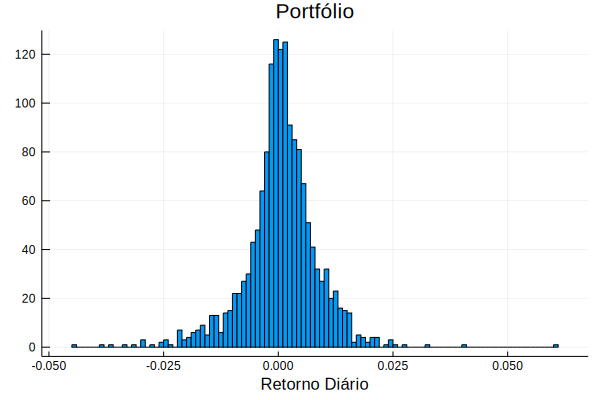

In [22]:
histogram(RP, nbins=100, title = "Portfólio", xlabel = "Retorno Diário", legend = false)

### 5.2 Cálculo do VaR: Abordagem Não-Paramétrica ($\mathrm{np}$)

$$\mathrm{VaR} = Z_\alpha V_p$$ onde $$Z_\alpha$$ é o $\alpha$-quantil da **Distribuição Empírica** dos retornos obtidos por simulação histórica. A função ```quantile(X,alfa)``` calcula o ```alfa```-quantil de ```X```.

In [23]:
println("DEaR(5%) simulação histórica não paramétrica = ", - quantile(RP,0.05) * VPortfolio, " USD 1x10^6")
println("DEaR(1%) simulação histórica não paramétrica = ", - quantile(RP,0.01) * VPortfolio, " USD 1x10^6")

DEaR(5%) simulação histórica não paramétrica = 0.9919752630559977 USD 1x10^6
DEaR(1%) simulação histórica não paramétrica = 1.6411477584974055 USD 1x10^6


### 5.3 Cálculo do VaR: Abordagem Semi-Paramétrica ($\mathrm{sp}$)

$$\text{VaR}_\alpha = - Z_\alpha V_p$$ com $$Z_\alpha = z_\alpha \sigma_p $$ onde o $\alpha$-quantil da distribuição empírica $Z_\alpha$ é agora determinado pelo produto de dois componemtes: ($\textrm{i}$) quantil $z_\alpha$ da distribuição padronizada escolhida, por exemplo $z_{5\%}$ será igual a -1.645 se a distribuição padronizada for a $\mathcal{N}(0,1)$ e ($\textrm{ii}$) $\sigma_p$ determinado por simulação histórica dos retornos do portfólio.

Iremos pois tentar encontrar em (5.3.1) uma distribuição analítica (e.g ```Normal```, ```T-Student```) que se ajuste bem à distribuição empírica dos retornos diários do portfólio já calculados em (5.1) por simulação histórica.

#### 5.3.1 Escolha da Distribuição Analítica

Nota para os cálculos que se seguem: o 'ponto'```.``` aplica um operador (e.g. +, *, /, exp, log, sin,...) a todos os elementos de um vetor/matriz. 

Exemplo: sendo ```x = [1.0,2.0,3.0]```, tem-se:
  * ```x.^2 = [1.0^2, 2.0^2, 3.0^2]```
  * ```log.(x .+ 1.0) = [log(1.0)+1.0,log(2.0)+1.0,log(3.0)+1.0]```

De referir ainda que, como é habitual em linguagens de programação, o ln(x) é calculado através da função ```log(x)```

In [24]:
mu = mean(RP)                 # média dos retornos do portfólio
sigma = std(RP)               # desvio-padrão dos retornos do portfólio
RP01 = (RP .- mu)./sigma;     # retornos do portfólio padronizados, com média = 0 e desvio-padrão = 1         

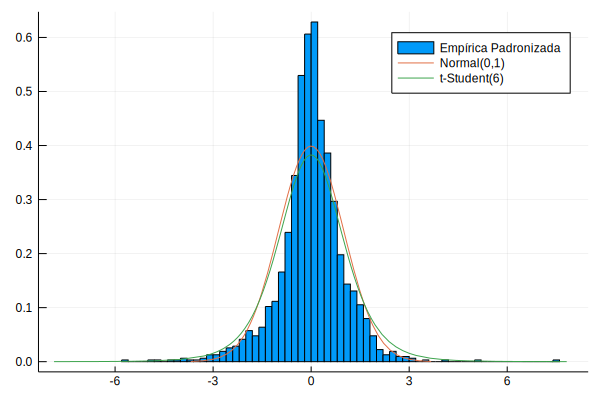

In [25]:
histogram(RP01, nbins=100, normed=true, label="Empírica Padronizada")
plot!(Normal(0,1), label = "Normal(0,1)")
plot!(TDist(6), label = "t-Student(6)")

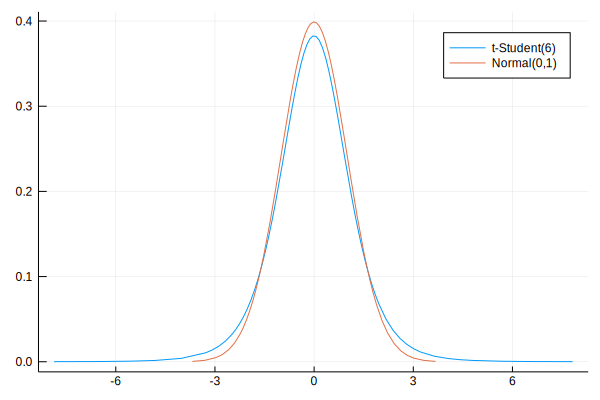

In [26]:
plot(TDist(6), label = "t-Student(6)")
plot!(Normal(0,1), label = "Normal(0,1)")

Conseguimos ter uma melhor visualização do que se passa nas caudas das distribuições através de um gráfico quantil-quantil (QQ). A função ```qqplot(Distribuição,X)```permite essa análise. Escolhemos analisar as distribuições Normal(0,1) e T-Student(g) com g = 5, 6, 7, 8, 9.

In [27]:
plot(                             
qqplot(Normal,   RP01, markersize=1, title = "Normal"),     # Normal(0,1)  vs. distribuição empírica padronizada
qqplot(TDist(5), RP01, markersize=1, title = "TDist(5)"),   # T-Student(5) vs. distribuição empírica padronizada
qqplot(TDist(6), RP01, markersize=1, title = "TDist(6)"),           
qqplot(TDist(7), RP01, markersize=1, title = "TDist(7)"),
qqplot(TDist(8), RP01, markersize=1, title = "TDist(8)"),
qqplot(TDist(9), RP01, markersize=1, title = "TDist(9)")
)

In [28]:
@manipulate for obs = 1:10
    qqplot(TDist(obs), RP01,
    markersize = 2, 
    title = "Distribuição Emprírica vs. T-Student com $(obs) graus liberdade",
    legend = :bottomright,
    xlabel = "Distribuição T-Student($(obs))", 
    ylabel = "Distribuição Empírica",
    label = "Observações")
end    
# MOVER o cursor (obs) no topo do gráfico seguinte para variar os graus de liberdade da distribuição T-Student!

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Scope("knockout-component-ffbd88c4-fcd8-4faf-aa50-2d095d733724", Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :label), Any["obs"], Dict{Symbol,Any}(:className=>"interact ",:style=>Dict{Any,Any}(:padding=>"5px 10px 0px 10px")), 1)], Dict{Symbol,Any}(:className=>"interact-flex-row-left"), 2), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :input), Any[], Dict{Symbol,Any}(:max=>10,:min=>1,:attributes=>Dict{Any,Any}(:type=>"range",Symbol("data-bind")=>"numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient"=>"horizontal"),:step=>1,:className=>"slider slider is-fullwidth",:style=>Dict{Any,Any}()), 0)], Dict{Symbol,Any}(:className=>"interact-flex-row-center"), 1), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes=>Dict("data-bind"=>"text: formatted_val")), 0)], Dict{Symbol,Any}(:className=>"interact-flex-row-right"), 1)], Dict{Symbol,Any}(:className=>"interact-flex-row interact-widget"), 7), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes"=>(Observable{Int64} with 1 listeners. Value:
0, nothing),"index"=>(Observable{Int64} with 2 listeners. Value:
5, nothing)), Set(String[]), nothing, Asset[Asset("js", "knockout", "/srv/julia/pkg/packages/Knockout/JE2Yq/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/srv/julia/pkg/packages/Knockout/JE2Yq/src/../assets/knockout_punches.js"), Asset("js", nothing, "/srv/julia/pkg/packages/InteractBase/R8JgH/src/../assets/all.js"), Asset("css", nothing, "/srv/julia/pkg/packages/InteractBase/R8JgH/src/../assets/style.css"), Asset("css", nothing, "/srv/julia/pkg/packages/Interact/0klKX/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("changes"=>Any[JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index"=>Any[JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), ConnectionPool(Channel{Any}(sz_max:9223372036854775807,sz_curr:0), Set(AbstractConnection[]), Channel{AbstractConnection}(sz_max:32,sz_curr:0)), WebIO.JSString[JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init : function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            })\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            })\n            ko.applyBindingsToNode(element, { value: stringified, valueUpdate: allBindings.get('valueUpdate')}, context);\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"1\",\"2\",\"3\",\"4\",\"5\",\"6\",\"7\",\"8\",\"9\",\"10\"],\"changes\":WebIO.getval({\"name\":\"changes\",\"scope\":\"knockout-component-ffbd88c4-fcd8-4faf-aa50-2d095d733724\",\"id\":\"ob_02\",\"type\":\"observable\"}),\"index\":WebIO.getval({\"name\":\"index\",\"scope\":\"knockout-component-ffbd88c4-fcd8-4faf-aa50-2d095d733724\",\"id\":\"ob_01\",\"type\":\"observable\"})};\n    var self = this;\n    function AppViewModel() {\n        for (var key in json_data) {\n            var el = json_data[key];\n            this[key] = Array.isArray(el) ? ko.observableArray(el) : ko.observabl

#### 5.3.2 Cálculo do VaR a 5% e 1%

In [29]:
println("DEaR(5%) simulação histórica (sp) = ", - quantile(TDist(7),0.05) * sigma * VPortfolio , " USD 1x10^6")
println("DEaR(1%) simulação histórica (sp) = ", - quantile(TDist(7),0.01) * sigma * VPortfolio , " USD 1x10^6")

DEaR(5%) simulação histórica (sp) = 1.121973090247115 USD 1x10^6
DEaR(1%) simulação histórica (sp) = 1.7753926782736285 USD 1x10^6


## 6. Análise de Stress 

Iremos analisar os cenários de stress correspondentes às (1%) piores perdas do portfolio. Depois de criarmos uma nova tabela ```TabelaRP``` apenas com os retornos do portfolio e respetivas datas, iremos identificar as datas em que as piores perdas ocorreram.

In [30]:
TabelaRP = TimeArray(datas,RP,[:RP]); # Tabela temporal com os retornos simulados do portfólio (coluna :RP) e datas

O passo seguinte será pois determinar para o portfólio quais os dias em que se verificaram retornos simulados $\leq$ 1%-quantil

In [31]:
stress = TabelaRP[ findall(TabelaRP[:RP] .<= quantile(RP,0.01)) ]  

16×1 TimeArray{Float64,1,Date,Array{Float64,1}} 2013-06-20 to 2019-01-03
│            │ RP      │
├────────────┼─────────┤
│ 2013-06-20 │ -0.0242 │
│ 2015-08-21 │ -0.0312 │
│ 2015-08-24 │ -0.0365 │
│ 2015-09-01 │ -0.0278 │
│ 2016-01-15 │ -0.0237 │
│ 2016-06-24 │ -0.0338 │
│ 2018-02-02 │ -0.0246 │
│ 2018-02-05 │ -0.0444 │
│ 2018-02-08 │ -0.039  │
│ 2018-03-22 │ -0.0244 │
│ 2018-10-10 │ -0.0299 │
│ 2018-10-24 │ -0.0257 │
│ 2018-12-04 │ -0.029  │
│ 2018-12-17 │ -0.022  │
│ 2018-12-24 │ -0.03   │
│ 2019-01-03 │ -0.0256 │

Certamente o ano de 2018 teria sido bastante stressante para o portfólio. O pior dia foi 5 Fevereiro de 2018, com uma queda de -4.44%. Vamos tentar ver o que poderá ter acontecido de especial nesse dia, quer nos mercados NYSE e NASDAQ, quer nos próprios EUA.

Em 5 Fevereiro 2018, o indíce Dow caiu -4.6%: [Dow suffers worst one-day point fall in history](https://www.youtube.com/watch?v=GJMmK0sAYBk). Mas porque é que os mercados abruptamente cairam tanto nesse dia? Frequentemente não é possivel associar uma causa económica ou política direta aos eventos extremos de 'crash' nas bolsas de ações nos dias precisos em que ocorrem. 

Tal não será porém o caso do dia 10 Outubro 2018, em que se verificou uma queda de -2.99% no valor do portfolio: [World stock markets dive as Trump attacks 'crazy' US rate hikes](https://www.theguardian.com/business/2018/oct/11/asian-stock-markets-dive-as-trump-attacks-crazy-us-rate-hikes).

## 7. Análise de Desempenho do Portfólio

Vamos analisar o desempenho do portfolio face ao desempenho do benchmark escolhido. Medidas de desempenho têm de levar em conta não só o retorno obtido, mas também o risco associado ao investimento no portfólio. Uma medida muito utilizada é o rácio Sharpe, criado por William Sharpe um dos autores do CAPM. O rácio Sharpe ex-ante é definido da seguinte forma:


$$S = \frac{E[R-R_b]}{\sqrt{\mathrm{var}[R-R_b]}}$$

onde $R$ é o retorno do portfólio e $R_b$ é o retorno do seu benchmark. Estamos contudo mais interessados na sua concretização empírica, o rácio Sharpe ex-post, que utiliza os retornos realizados e não o valor esperado de retornos futuros.
Denotando os retornos em excesso do portfólio face ao benchmark (os quais podem ser negativos) por $X_i$,

$$X_i = R_i-R_{bi}$$
$$\mu_x=\tfrac{1}{N}\sum_{i=1}^N X_i$$
e
$$S = \frac{\mu_x}{\sqrt{\tfrac{1}{N}\sum_{i=1}^N (X_i-\mu_x)^2}}$$
onde normalmente se utiliza a variância da amostra.

### 8.1 Portfolio vs. S&P500

O benchmark natural do portfólio será o índice S&P500:

In [32]:
X = RP .- R[:,2]                    # Vetor com os retornos em excesso do portfólio face ao S&P 500
Sharpe = mean(X)/std(X)             # Notemos que mean(X) e std(X) são números e não vetores, daí não usarmos ./

0.08936018795327476

### 8.2 Portfolio vs. BT3m

Utilizando agora aplicações em Bilhetes do Tesouro a 3 meses como benchmark do portfólio:

In [33]:
X_P = RP .- R[:,1]                  # Vetor com os retornos em excesso do portfólio face a BT3m
Sharpe = mean(X_P)/std(X_P)

0.07713889929383447